MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


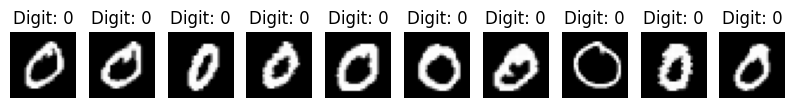

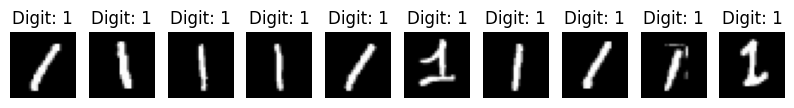

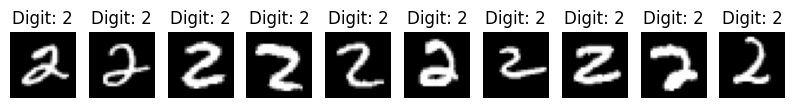

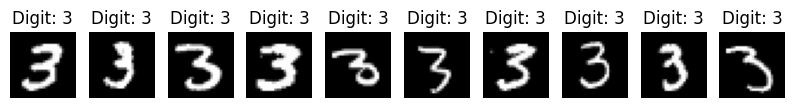

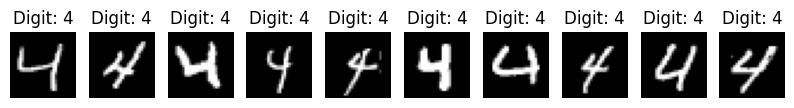

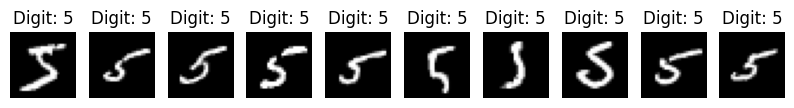

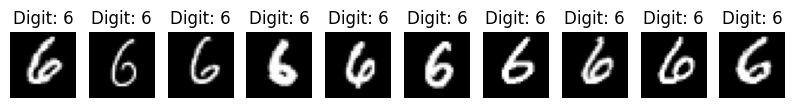

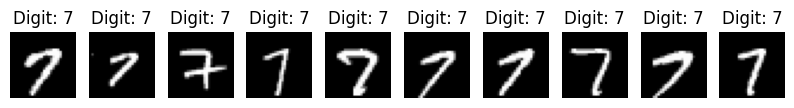

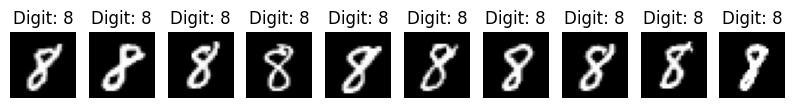

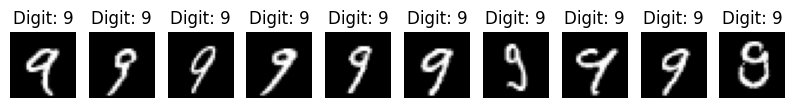

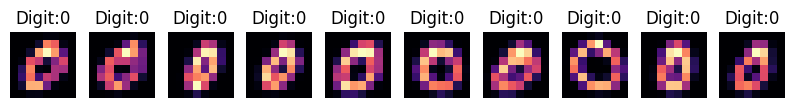

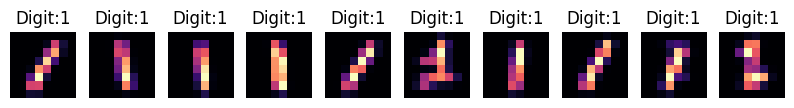

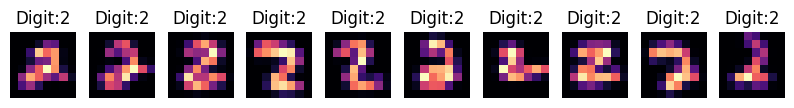

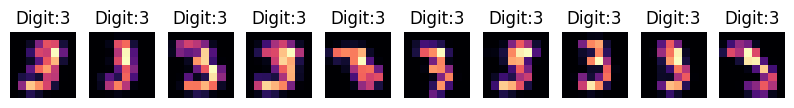

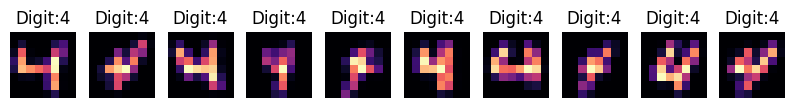

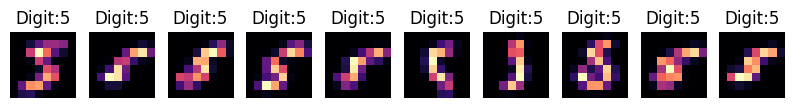

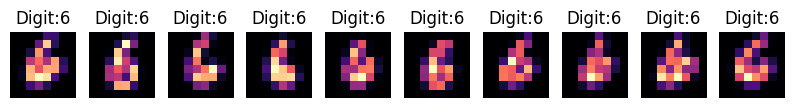

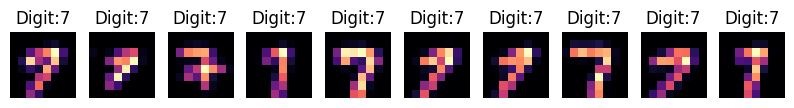

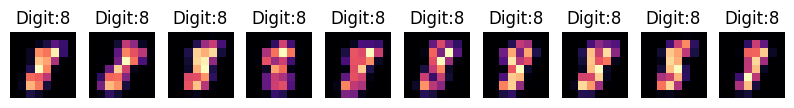

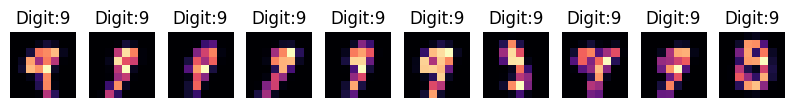

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [1]:
# Quantum Amplitude Encoding-all3 cases complex 128
import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)  # or just remove the line

    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"C:\Users\Asus\Downloads\archive (8)\train-images.idx3-ubyte"
train_labels_file = r"C:\Users\Asus\Downloads\archive (8)\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(np.abs(sample_images[i].reshape(28,28)), cmap='gray')

        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits
N = 8
from skimage.transform import resize

def resize_images(images, new_size = (N,N)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (N,N)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []
for i in range(len(Digit_zero)):
    normalized = (Digit_zero[i].reshape(N**2,1))/np.linalg.norm(Digit_zero[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_zero_.append(complex_state)

Digit_one_ = []

for i in range(len(Digit_one)):
    normalized = (Digit_one[i].reshape(N**2,1))/np.linalg.norm(Digit_one[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_one_.append(complex_state)

Digit_two_ = []

for i in range(len(Digit_two)):
    normalized = (Digit_two[i].reshape(N**2,1))/np.linalg.norm(Digit_two[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_two_.append(complex_state)

Digit_three_ = []

for i in range(len(Digit_three)):
    normalized = (Digit_three[i].reshape(N**2,1))/np.linalg.norm(Digit_three[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_three_.append(complex_state)

Digit_four_ = []

for i in range(len(Digit_four)):
    normalized = (Digit_four[i].reshape(N**2,1))/np.linalg.norm(Digit_four[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_four_.append(complex_state)

Digit_fifth_ = []

for i in range(len(Digit_fifth)):
    normalized = (Digit_fifth[i].reshape(N**2,1))/np.linalg.norm(Digit_fifth[i])
    # Add small random phase for complex encoding
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_fifth_.append(complex_state)

# Digit 6
Digit_sixth_ = []
for i in range(len(Digit_sixth)):
    normalized = (Digit_sixth[i].reshape(N**2,1))/np.linalg.norm(Digit_sixth[i])
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_sixth_.append(complex_state)

# Digit 7
Digit_seventh_ = []
for i in range(len(Digit_seventh)):
    normalized = (Digit_seventh[i].reshape(N**2,1))/np.linalg.norm(Digit_seventh[i])
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_seventh_.append(complex_state)

# Digit 8
Digit_eigth_ = []
for i in range(len(Digit_eigth)):
    normalized = (Digit_eigth[i].reshape(N**2,1))/np.linalg.norm(Digit_eigth[i])
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_eigth_.append(complex_state)

# Digit 9
Digit_nineth_ = []
for i in range(len(Digit_nineth)):
    normalized = (Digit_nineth[i].reshape(N**2,1))/np.linalg.norm(Digit_nineth[i])
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    Digit_nineth_.append(complex_state)



Input_state_vector_zero = np.array(Digit_zero_[:5000])
Input_state_vector_one = np.array(Digit_one_[:5000])
Input_state_vector_two = np.array(Digit_two_[:5000])
Input_state_vector_three = np.array(Digit_three_[:5000])
Input_state_vector_four = np.array(Digit_four_[:5000])
Input_state_vector_fifth = np.array(Digit_fifth_[:5000])
Input_state_vector_sixth = np.array(Digit_sixth_[:5000])
Input_state_vector_seventh = np.array(Digit_seventh_[:5000])
Input_state_vector_eigth = np.array(Digit_eigth_[:5000])
Input_state_vector_nineth = np.array(Digit_nineth_[:5000])

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.array(input_state_vectors, dtype=np.complex128)

input_state_vectors = input_state_vectors.reshape(50000,N*N)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-labels.idx1-ubyte")


# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((N, N))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2))/np.linalg.norm(images_resized[i]))

input_state_test_vectors_complex = []
for i in range(len(images_resized)):
    normalized = (images_resized[i].reshape(N**2))/np.linalg.norm(images_resized[i])
    phase = np.random.uniform(0, 2*np.pi, size=normalized.shape) * 0.1
    complex_state = normalized * np.exp(1j * phase)
    input_state_test_vectors_complex.append(complex_state)

input_state_test_vectors = np.array(input_state_test_vectors_complex, dtype=np.complex128)
input_state_test_vectors = torch.tensor(input_state_test_vectors, dtype=torch.complex128)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\1174678647.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),



TRAINING CASE 1
Training Case 1 on device: cpu


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\1174678647.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)


Epoch 1/30 - Case 1 Total: 8.476489 (Recon: 4.238245, Class: 0.000000) - Train Acc: 11.13% - Test Acc: 11.16%
Epoch 2/30 - Case 1 Total: 8.520292 (Recon: 4.260146, Class: 0.000000) - Train Acc: 17.55% - Test Acc: 17.71%
Epoch 3/30 - Case 1 Total: 8.367473 (Recon: 4.183737, Class: 0.000000) - Train Acc: 42.76% - Test Acc: 43.42%
Epoch 4/30 - Case 1 Total: 8.216617 (Recon: 4.108308, Class: 0.000000) - Train Acc: 57.01% - Test Acc: 60.55%
Epoch 5/30 - Case 1 Total: 8.032169 (Recon: 4.016084, Class: 0.000000) - Train Acc: 61.55% - Test Acc: 64.49%
Epoch 6/30 - Case 1 Total: 7.941888 (Recon: 3.970944, Class: 0.000000) - Train Acc: 66.22% - Test Acc: 69.45%
Epoch 7/30 - Case 1 Total: 7.821242 (Recon: 3.910621, Class: 0.000000) - Train Acc: 70.92% - Test Acc: 73.79%
Epoch 8/30 - Case 1 Total: 7.782525 (Recon: 3.891263, Class: 0.000000) - Train Acc: 70.89% - Test Acc: 73.57%
Epoch 9/30 - Case 1 Total: 7.736307 (Recon: 3.868154, Class: 0.000000) - Train Acc: 66.83% - Test Acc: 70.22%
Epoch 10/3

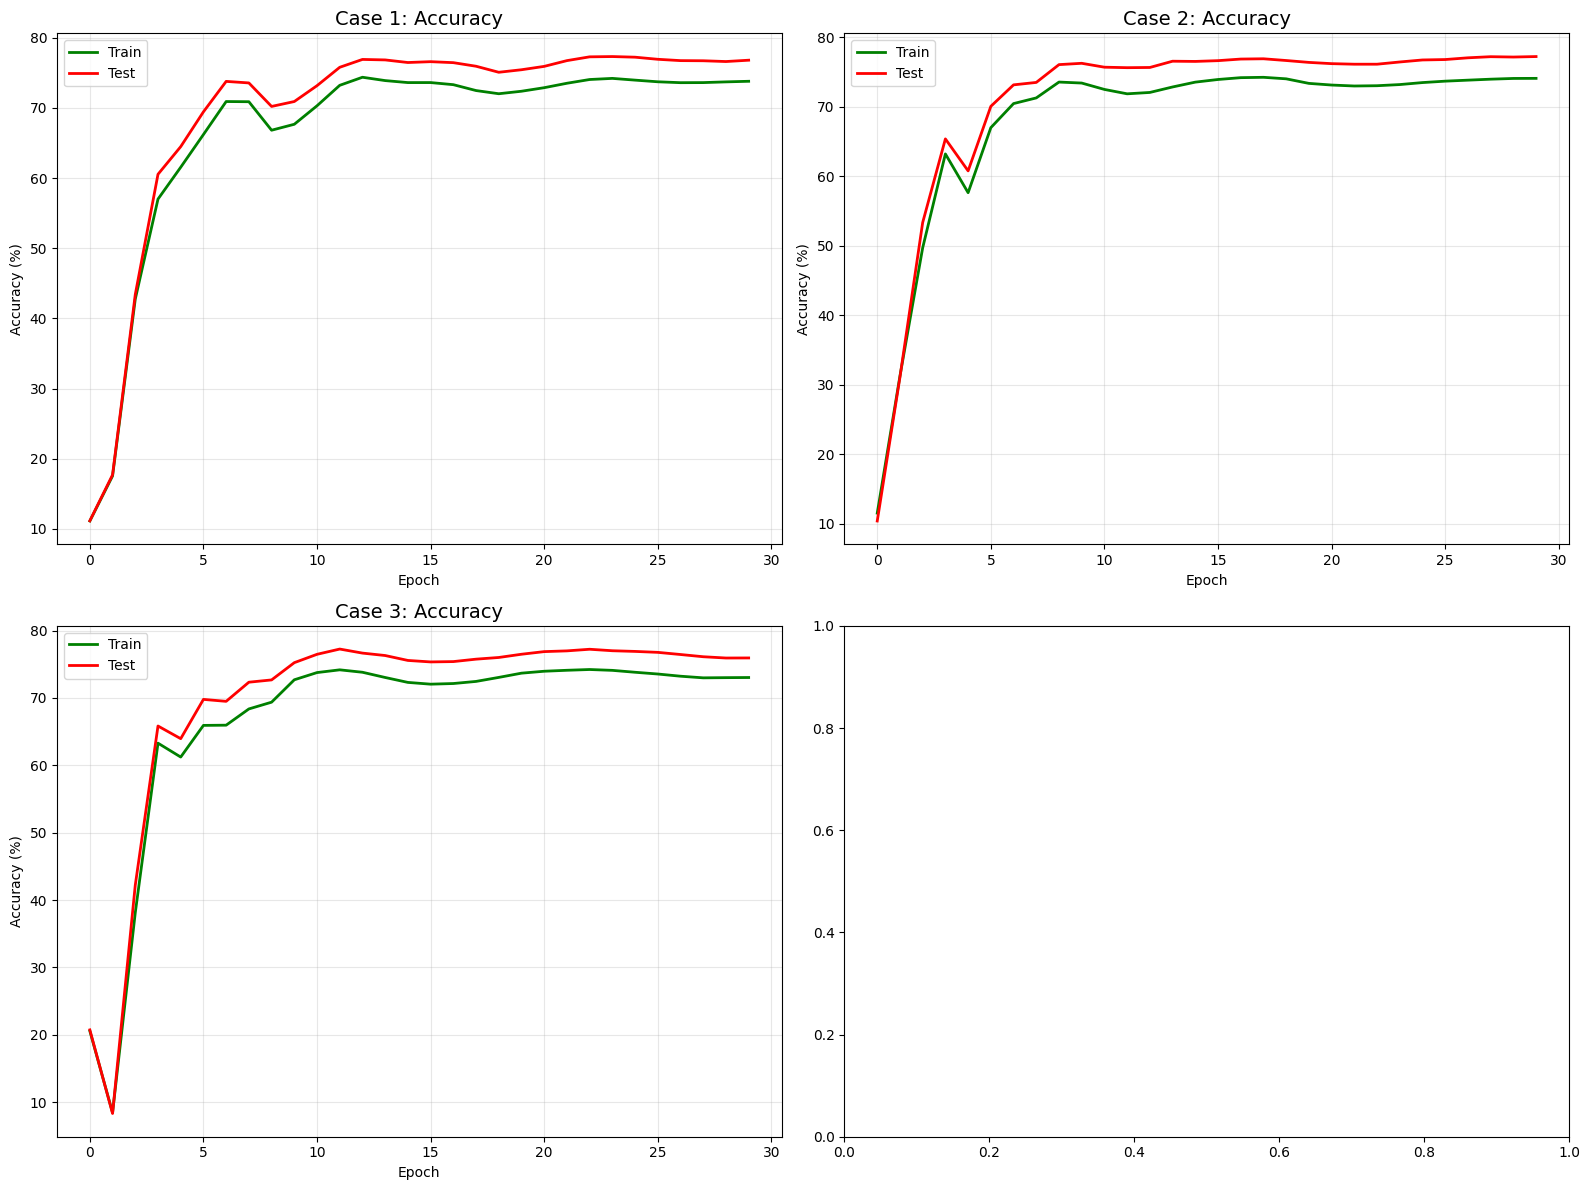

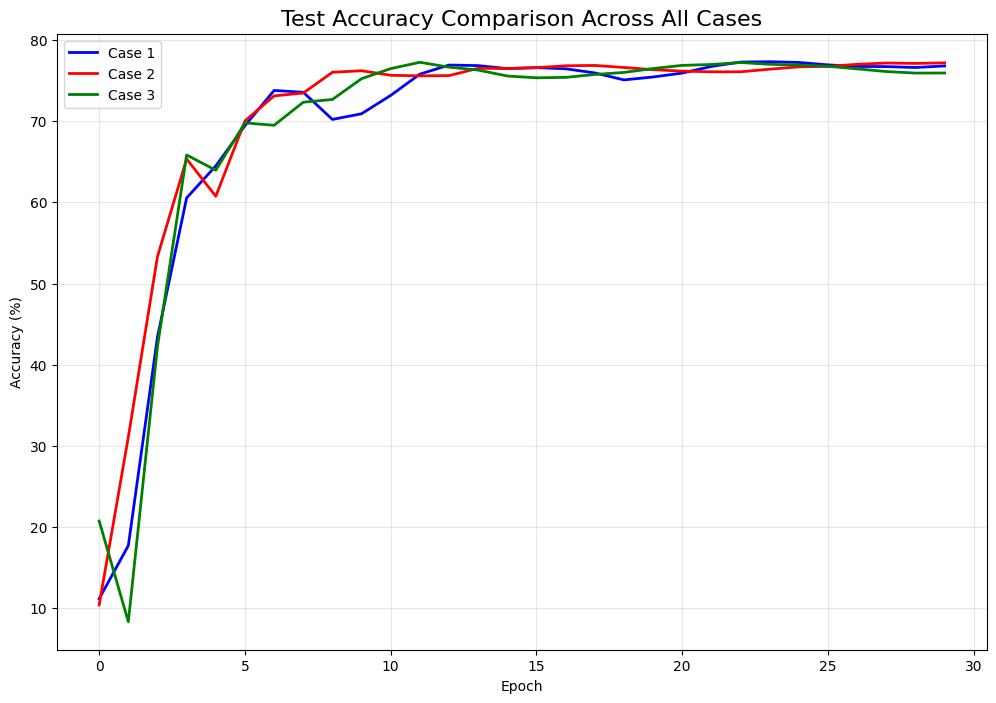


FINAL TRAINING SUMMARY
[ERROR] Unexpected exception: unsupported format string passed to list.__format__


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\1174678647.py", line 430, in main
    print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: unsupported format string passed to list.__format__


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt



class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=3, num_classes=10, case=1):
        super(QuantumUnitaryNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.layer_norm = nn.LayerNorm(self.hidden_dim)

        
        self.forward_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])
        

        self.reverse_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])

    def _create_target_vectors(self):

        target_states_combined = torch.zeros((50000, 64), dtype=torch.complex128)
        target_states_combined[0:5000, 0] = 1
        target_states_combined[5000:10000, 7] = 1
        target_states_combined[10000:15000, 14] = 1
        target_states_combined[15000:20000, 21] = 1
        target_states_combined[20000:25000, 28] = 1
        target_states_combined[25000:30000, 35] = 1
        target_states_combined[30000:35000, 42] = 1
        target_states_combined[35000:40000, 49] = 1
        target_states_combined[40000:45000, 56] = 1
        target_states_combined[45000:50000, 63] = 1

        target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
        return F.normalize(target_states_combined, p=2, dim=1)
            
    

    @staticmethod
    def _make_unitary(w):
        q, r = torch.linalg.qr(w)
        ph   = torch.sgn(torch.diag(r))
        return q * ph


    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):
        if self.case == 1:
            return self._case1_forward(x)
        elif self.case == 2:
            return self._case2_forward(x)
        elif self.case == 3:
            return self._case3_forward(x)
        else:
            raise ValueError("Invalid case value. Must be 1, 2, or 3.")


    def _case1_forward(self, x):

        target_vectors = self._create_target_vectors()

        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x@Uf1
        R1 = target_vectors@UR1
        F2 = F1@Uf2
        R2 = R1@UR2
        F3 = F2@Uf3
        R3 = R2@UR3

        Final = x@Uf1@Uf2@Uf3@UR3.conj().T@UR2.conj().T@UR1.conj().T

        return F1,F2,F3,R1,R2,R3,Final
    def _case2_forward(self, x):
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return Final

    def _case3_forward(self, x):
        target_vectors = self._create_target_vectors()
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x @ Uf1
        R1 = target_vectors @ UR1
        F2 = F1 @ Uf2
        R2 = R1 @ UR2
        F3 = F2 @ Uf3
        R3 = R2 @ UR3
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return F1, F2, F3, R1, R2, R3, Final




def case1_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_Fina1_target = F.cross_entropy(torch.abs(Final), torch.abs(target))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
                + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + reconstruction_loss_Fina1_target
    
    return total_loss

def case2_loss(Final, target):
    return F.cross_entropy(torch.abs(Final), torch.abs(target))

def case3_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    cross_entropy_loss = F.cross_entropy(torch.abs(Final), torch.abs(target))
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
               + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + cross_entropy_loss
    return total_loss



idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
T_train = np.zeros((50000, 64), dtype=np.complex128)
for c in range(10):
    T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

T_test = np.zeros((10000, 64), dtype=np.complex128)
for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0
train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.complex128),
                             torch.tensor(T_train, dtype=torch.complex128))
test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),
                             torch.tensor(T_test,  dtype=torch.complex128))

train_loader = DataLoader(train_dataset, batch_size=50000, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False, num_workers=0)



def evaluate_model(model, data_loader, device):
    model.eval()
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                F1,F2,F3,R1,R2,R3,Final = model(data)
            
                classes = torch.argmax(torch.abs(Final), dim=1)//7
                target_classes = torch.argmax(torch.abs(target), dim=1)//7
                correct = 0
                for i in range(len(classes)):
                    if classes[i] == target_classes[i]:
                        correct+=1

                accuracy = 100 * correct / 50000
            return accuracy

def evaluate_model_case2(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            Final = model(data)

       
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy

def evaluate_model_case3(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            _, _, _, _, _, _, Final = model(data)

    
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=100, learning_rate=0.001):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_reconstruction_loss = 0.0
        total_classification_loss = 0.0
        total_layer_constraint_loss = 0.0
        processed_batches = 0
        train_accuracy = 0
        test_accuracy = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case1_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()

            elif model.case == 2:
                Final = model(data)
                total_loss = case2_loss(Final, target)
                total_classification_loss += total_loss.item()

            elif model.case == 3:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case3_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()


            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # model.enforce_unitary_constraints()
            total_loss += total_loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss / processed_batches
            train_losses.append(avg_loss)

        if model.case == 1:
            train_accuracy = evaluate_model(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model(model, test_loader, device)
                test_accuracy*=5
        elif model.case == 2:
            train_accuracy = evaluate_model_case2(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case2(model, test_loader, device)
        elif model.case == 3:
            train_accuracy = evaluate_model_case3(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case3(model, test_loader, device)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)




        if model.case == 1 :
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches
            print(f"Epoch {epoch+1}/{num_epochs} - Case 1 Total: {avg_loss:.6f} "
                  f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                  f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 2:
            print(f"Epoch {epoch+1}/{num_epochs} - Case 2 Total: {avg_loss:.6f} "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 3:
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches if total_classification_loss > 0 else 0
            print(f"Epoch {epoch+1}/{num_epochs} - Case 3 Total: {avg_loss:.6f} "
                f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")



    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracies, test_accuracies




def main():
    """Main training pipeline"""
    
    input_dim = 64
    hidden_dim = 64
    degrees = 3
    num_classes = 10
    batch_size = 128
    num_epochs = 30
    learning_rate = 0.01

    try:


        all_results = {}


        for case_num in [1,2,3]:
            print("\n" + "="*60)
            print(f"TRAINING CASE {case_num}")
            print("="*60)
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=degrees,
                num_classes=num_classes,
                case=case_num
            )
            train_losses, train_acc, test_acc= train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            all_results[case_num] = {
                'model': model,
                'train_losses': train_losses,
                'train_acc': train_acc,
                'test_acc': test_acc
            }
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                axes[i].plot(results['train_acc'], 'g-', linewidth=2, label='Train')
                axes[i].plot(results['test_acc'], 'r-', linewidth=2, label='Test')
                axes[i].set_title(f'Case {case_num}: Accuracy', fontsize=14)
                axes[i].set_xlabel('Epoch')
                axes[i].set_ylabel('Accuracy (%)')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Comparison plot
        plt.figure(figsize=(12, 8))
        colors = ['blue', 'red', 'green', 'orange']
        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                plt.plot(results['test_acc'], color=colors[i], linewidth=2, label=f'Case {case_num}')

        plt.title('Test Accuracy Comparison Across All Cases', fontsize=16)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\n" + "="*60)
        print("FINAL TRAINING SUMMARY")
        print("="*60)
        for case_num in [1, 2, 3, 4]:
            if case_num in all_results:
                results = all_results[case_num]
                print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                print(f"Case {case_num} - Best Test Accuracy: {results['test_acc']:.2f}%")
        
        print("\nTraining completed successfully!")

    except FileNotFoundError as e:
        print("- train-images.idx3-ubyte")
        print("- train-labels.idx1-ubyte") 
        print("- t10k-images.idx3-ubyte")
        print("- t10k-labels.idx1-ubyte")
    except Exception as e:
        print(f"[ERROR] Unexpected exception: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3972119339.py:180: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),



TRAINING CASE 1
Training Case 1 on device: cpu


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3972119339.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)


Epoch 1/30 - Case 1 Total: 8.511331 (Recon: 4.255665, Class: 0.000000) - Train Acc: 16.15% - Test Acc: 16.29%
Epoch 2/30 - Case 1 Total: 8.355216 (Recon: 4.177608, Class: 0.000000) - Train Acc: 62.73% - Test Acc: 64.89%
Epoch 3/30 - Case 1 Total: 8.030143 (Recon: 4.015071, Class: 0.000000) - Train Acc: 64.91% - Test Acc: 67.77%
Epoch 4/30 - Case 1 Total: 7.868084 (Recon: 3.934042, Class: 0.000000) - Train Acc: 66.14% - Test Acc: 68.83%
Epoch 5/30 - Case 1 Total: 7.767415 (Recon: 3.883708, Class: 0.000000) - Train Acc: 70.79% - Test Acc: 73.76%
Epoch 6/30 - Case 1 Total: 7.728676 (Recon: 3.864338, Class: 0.000000) - Train Acc: 70.61% - Test Acc: 73.98%
Epoch 7/30 - Case 1 Total: 7.702837 (Recon: 3.851419, Class: 0.000000) - Train Acc: 68.39% - Test Acc: 71.42%
Epoch 8/30 - Case 1 Total: 7.680825 (Recon: 3.840413, Class: 0.000000) - Train Acc: 70.42% - Test Acc: 73.88%
Epoch 9/30 - Case 1 Total: 7.661690 (Recon: 3.830845, Class: 0.000000) - Train Acc: 72.51% - Test Acc: 75.63%
Epoch 10/3

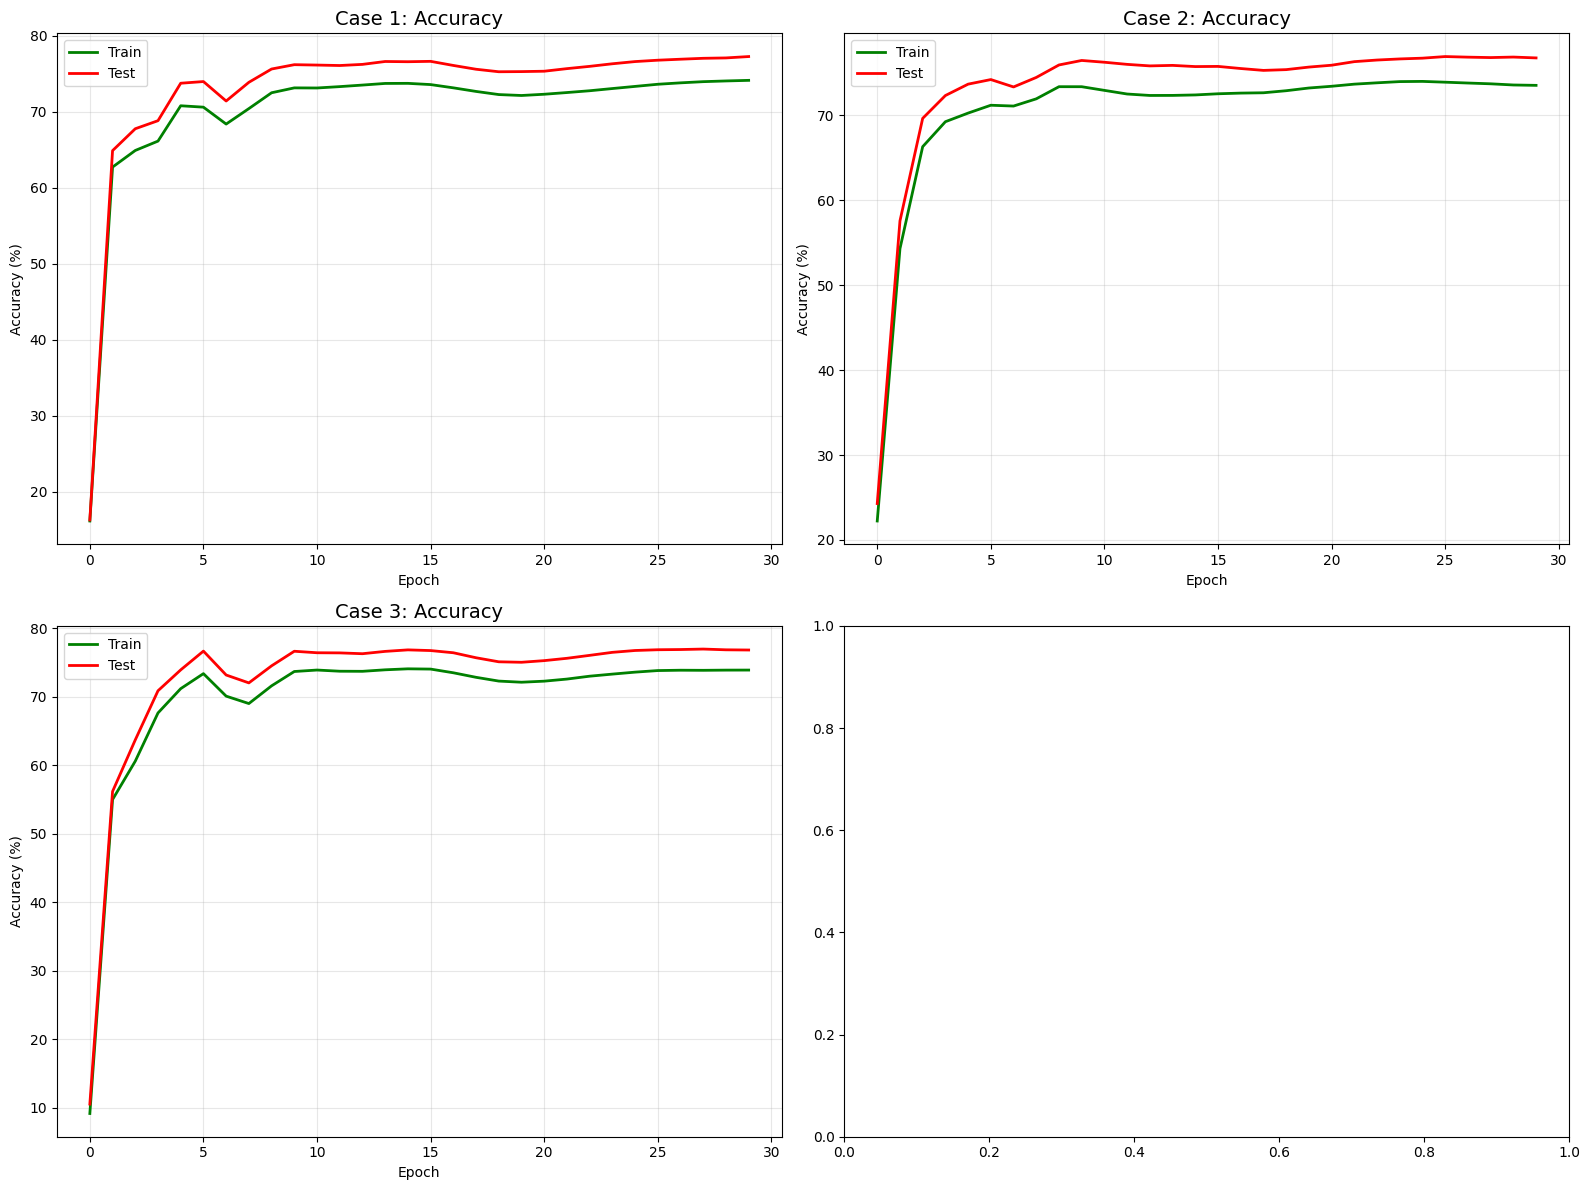

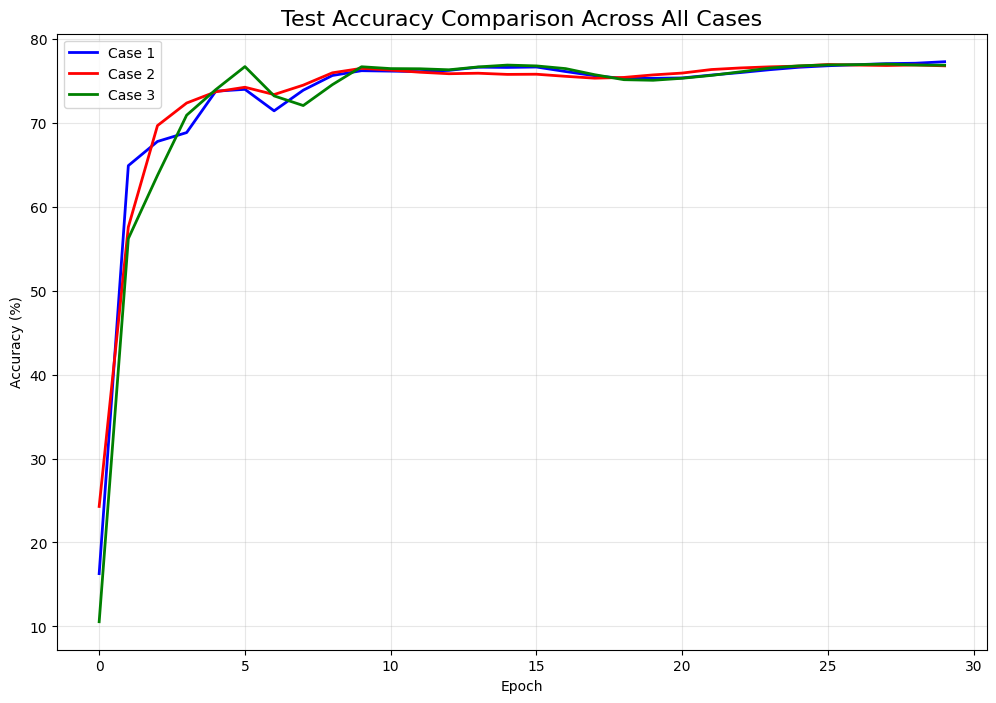


FINAL TRAINING SUMMARY
[ERROR] Unexpected exception: unsupported format string passed to list.__format__


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3972119339.py", line 432, in main
    print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: unsupported format string passed to list.__format__


In [3]:

#SVD
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt



class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=3, num_classes=10, case=1):
        super(QuantumUnitaryNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.layer_norm = nn.LayerNorm(self.hidden_dim)

        
        self.forward_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])
        

        self.reverse_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])

    def _create_target_vectors(self):

        target_states_combined = torch.zeros((50000, 64), dtype=torch.complex128)
        target_states_combined[0:5000, 0] = 1
        target_states_combined[5000:10000, 7] = 1
        target_states_combined[10000:15000, 14] = 1
        target_states_combined[15000:20000, 21] = 1
        target_states_combined[20000:25000, 28] = 1
        target_states_combined[25000:30000, 35] = 1
        target_states_combined[30000:35000, 42] = 1
        target_states_combined[35000:40000, 49] = 1
        target_states_combined[40000:45000, 56] = 1
        target_states_combined[45000:50000, 63] = 1

        target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
        return F.normalize(target_states_combined, p=2, dim=1)
            
    

    @staticmethod
    @staticmethod
    def _make_unitary(w):
        U, _, Vh = torch.linalg.svd(w)
        return U @ Vh



    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):
        if self.case == 1:
            return self._case1_forward(x)
        elif self.case == 2:
            return self._case2_forward(x)
        elif self.case == 3:
            return self._case3_forward(x)
        else:
            raise ValueError("Invalid case value. Must be 1, 2, or 3.")


    def _case1_forward(self, x):

        target_vectors = self._create_target_vectors()

        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x@Uf1
        R1 = target_vectors@UR1
        F2 = F1@Uf2
        R2 = R1@UR2
        F3 = F2@Uf3
        R3 = R2@UR3

        Final = x@Uf1@Uf2@Uf3@UR3.conj().T@UR2.conj().T@UR1.conj().T

        return F1,F2,F3,R1,R2,R3,Final
    def _case2_forward(self, x):
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return Final

    def _case3_forward(self, x):
        target_vectors = self._create_target_vectors()
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x @ Uf1
        R1 = target_vectors @ UR1
        F2 = F1 @ Uf2
        R2 = R1 @ UR2
        F3 = F2 @ Uf3
        R3 = R2 @ UR3
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return F1, F2, F3, R1, R2, R3, Final




def case1_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_Fina1_target = F.cross_entropy(torch.abs(Final), torch.abs(target))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
                + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + reconstruction_loss_Fina1_target
    
    return total_loss

def case2_loss(Final, target):
    return F.cross_entropy(torch.abs(Final), torch.abs(target))

def case3_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    cross_entropy_loss = F.cross_entropy(torch.abs(Final), torch.abs(target))
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
               + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + cross_entropy_loss
    return total_loss



idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
T_train = np.zeros((50000, 64), dtype=np.complex128)
for c in range(10):
    T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

T_test = np.zeros((10000, 64), dtype=np.complex128)
for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0
train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.complex128),
                             torch.tensor(T_train, dtype=torch.complex128))
test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),
                             torch.tensor(T_test,  dtype=torch.complex128))

train_loader = DataLoader(train_dataset, batch_size=50000, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False, num_workers=0)



def evaluate_model(model, data_loader, device):
    model.eval()
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                F1,F2,F3,R1,R2,R3,Final = model(data)
            
                classes = torch.argmax(torch.abs(Final), dim=1)//7
                target_classes = torch.argmax(torch.abs(target), dim=1)//7
                correct = 0
                for i in range(len(classes)):
                    if classes[i] == target_classes[i]:
                        correct+=1

                accuracy = 100 * correct / 50000
            return accuracy

def evaluate_model_case2(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            Final = model(data)

       
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy

def evaluate_model_case3(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            _, _, _, _, _, _, Final = model(data)

    
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=100, learning_rate=0.001):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_reconstruction_loss = 0.0
        total_classification_loss = 0.0
        total_layer_constraint_loss = 0.0
        processed_batches = 0
        train_accuracy = 0
        test_accuracy = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case1_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()

            elif model.case == 2:
                Final = model(data)
                total_loss = case2_loss(Final, target)
                total_classification_loss += total_loss.item()

            elif model.case == 3:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case3_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()


            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # model.enforce_unitary_constraints()
            total_loss += total_loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss / processed_batches
            train_losses.append(avg_loss)

        if model.case == 1:
            train_accuracy = evaluate_model(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model(model, test_loader, device)
                test_accuracy*=5
        elif model.case == 2:
            train_accuracy = evaluate_model_case2(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case2(model, test_loader, device)
        elif model.case == 3:
            train_accuracy = evaluate_model_case3(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case3(model, test_loader, device)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)




        if model.case == 1 :
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches
            print(f"Epoch {epoch+1}/{num_epochs} - Case 1 Total: {avg_loss:.6f} "
                  f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                  f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 2:
            print(f"Epoch {epoch+1}/{num_epochs} - Case 2 Total: {avg_loss:.6f} "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 3:
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches if total_classification_loss > 0 else 0
            print(f"Epoch {epoch+1}/{num_epochs} - Case 3 Total: {avg_loss:.6f} "
                f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")



    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracies, test_accuracies




def main():
    """Main training pipeline"""
    
    input_dim = 64
    hidden_dim = 64
    degrees = 3
    num_classes = 10
    batch_size = 128
    num_epochs = 30
    learning_rate = 0.01

    try:


        all_results = {}


        for case_num in [1,2,3]:
            print("\n" + "="*60)
            print(f"TRAINING CASE {case_num}")
            print("="*60)
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=degrees,
                num_classes=num_classes,
                case=case_num
            )
            train_losses, train_acc, test_acc= train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            all_results[case_num] = {
                'model': model,
                'train_losses': train_losses,
                'train_acc': train_acc,
                'test_acc': test_acc
            }
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                axes[i].plot(results['train_acc'], 'g-', linewidth=2, label='Train')
                axes[i].plot(results['test_acc'], 'r-', linewidth=2, label='Test')
                axes[i].set_title(f'Case {case_num}: Accuracy', fontsize=14)
                axes[i].set_xlabel('Epoch')
                axes[i].set_ylabel('Accuracy (%)')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Comparison plot
        plt.figure(figsize=(12, 8))
        colors = ['blue', 'red', 'green', 'orange']
        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                plt.plot(results['test_acc'], color=colors[i], linewidth=2, label=f'Case {case_num}')

        plt.title('Test Accuracy Comparison Across All Cases', fontsize=16)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\n" + "="*60)
        print("FINAL TRAINING SUMMARY")
        print("="*60)
        for case_num in [1, 2, 3, 4]:
            if case_num in all_results:
                results = all_results[case_num]
                print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                print(f"Case {case_num} - Best Test Accuracy: {results['test_acc']:.2f}%")
        
        print("\nTraining completed successfully!")

    except FileNotFoundError as e:
        print("- train-images.idx3-ubyte")
        print("- train-labels.idx1-ubyte") 
        print("- t10k-images.idx3-ubyte")
        print("- t10k-labels.idx1-ubyte")
    except Exception as e:
        print(f"[ERROR] Unexpected exception: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\484588850.py:183: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),



TRAINING CASE 1
Training Case 1 on device: cpu


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\484588850.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)


Epoch 1/30 - Case 1 Total: 8.417782 (Recon: 4.208891, Class: 0.000000) - Train Acc: 14.03% - Test Acc: 14.81%
Epoch 2/30 - Case 1 Total: 8.396932 (Recon: 4.198466, Class: 0.000000) - Train Acc: 16.91% - Test Acc: 17.65%
Epoch 3/30 - Case 1 Total: 8.365483 (Recon: 4.182742, Class: 0.000000) - Train Acc: 40.97% - Test Acc: 42.95%
Epoch 4/30 - Case 1 Total: 8.177241 (Recon: 4.088620, Class: 0.000000) - Train Acc: 57.17% - Test Acc: 60.35%
Epoch 5/30 - Case 1 Total: 7.984483 (Recon: 3.992242, Class: 0.000000) - Train Acc: 64.37% - Test Acc: 66.79%
Epoch 6/30 - Case 1 Total: 7.895526 (Recon: 3.947763, Class: 0.000000) - Train Acc: 69.61% - Test Acc: 72.56%
Epoch 7/30 - Case 1 Total: 7.807779 (Recon: 3.903890, Class: 0.000000) - Train Acc: 70.51% - Test Acc: 73.67%
Epoch 8/30 - Case 1 Total: 7.760190 (Recon: 3.880095, Class: 0.000000) - Train Acc: 68.90% - Test Acc: 72.06%
Epoch 9/30 - Case 1 Total: 7.733032 (Recon: 3.866516, Class: 0.000000) - Train Acc: 70.58% - Test Acc: 73.29%
Epoch 10/3

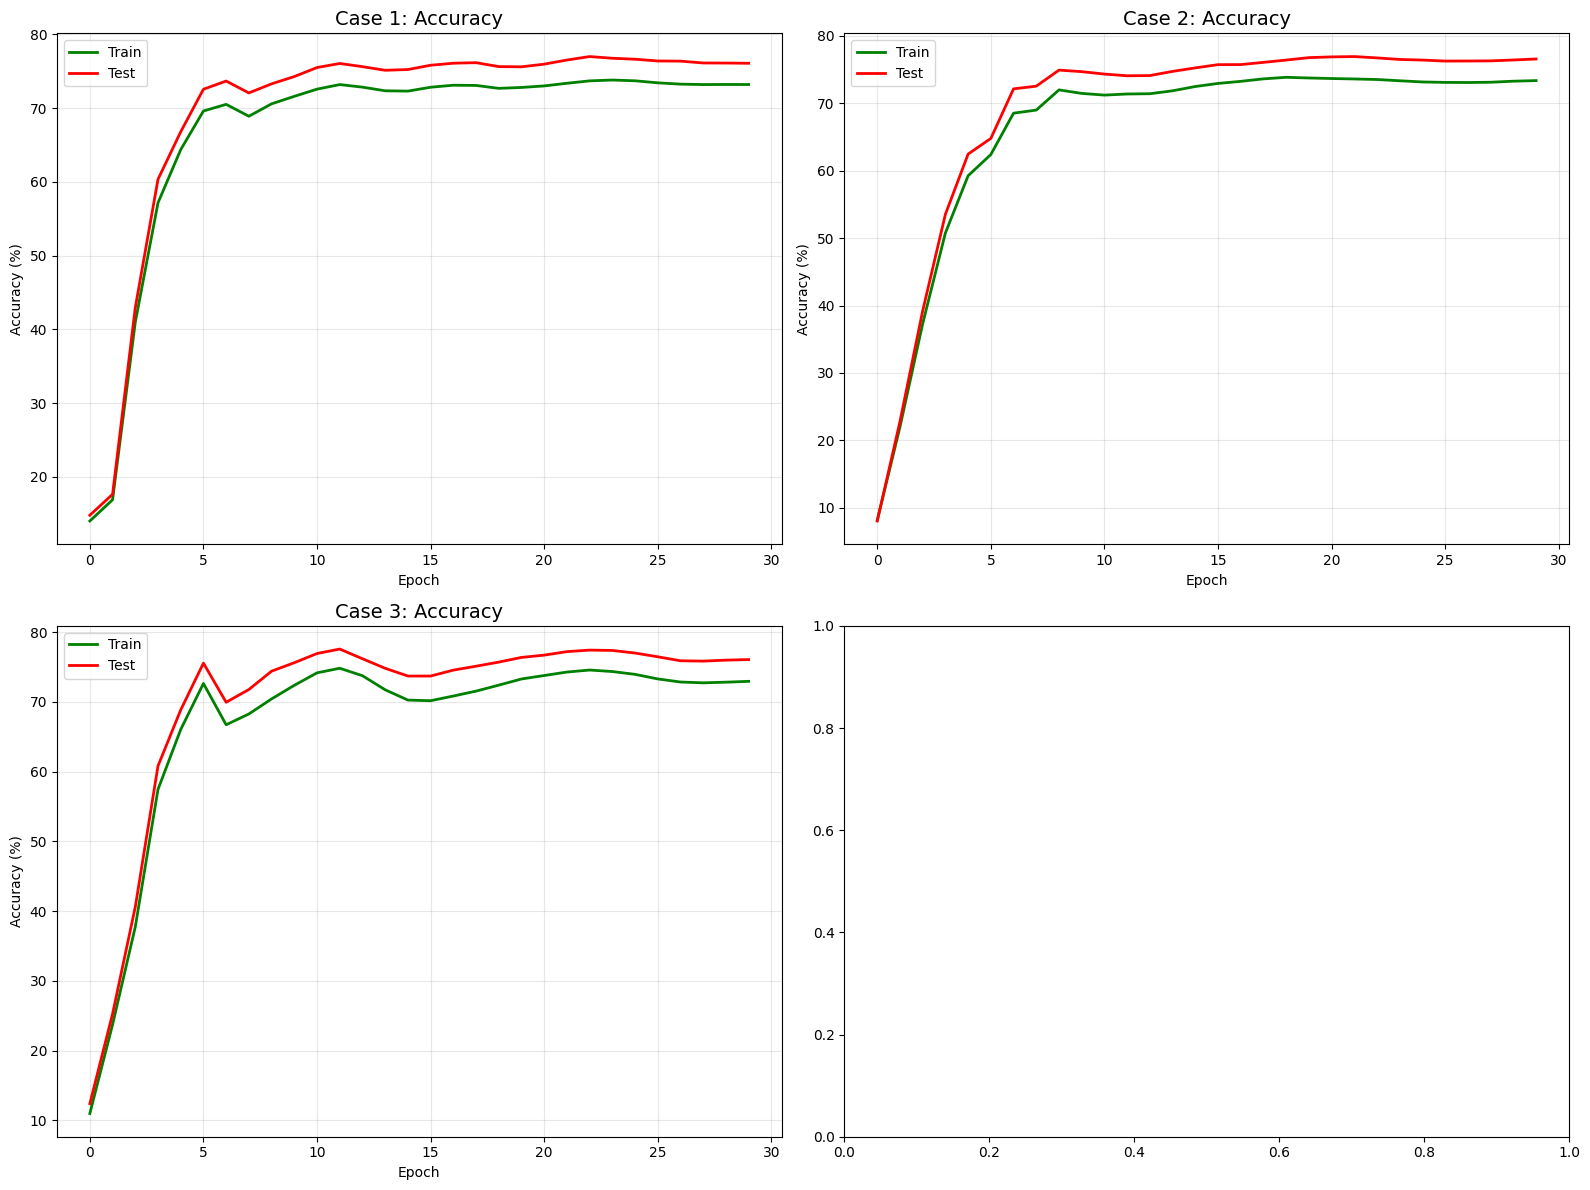

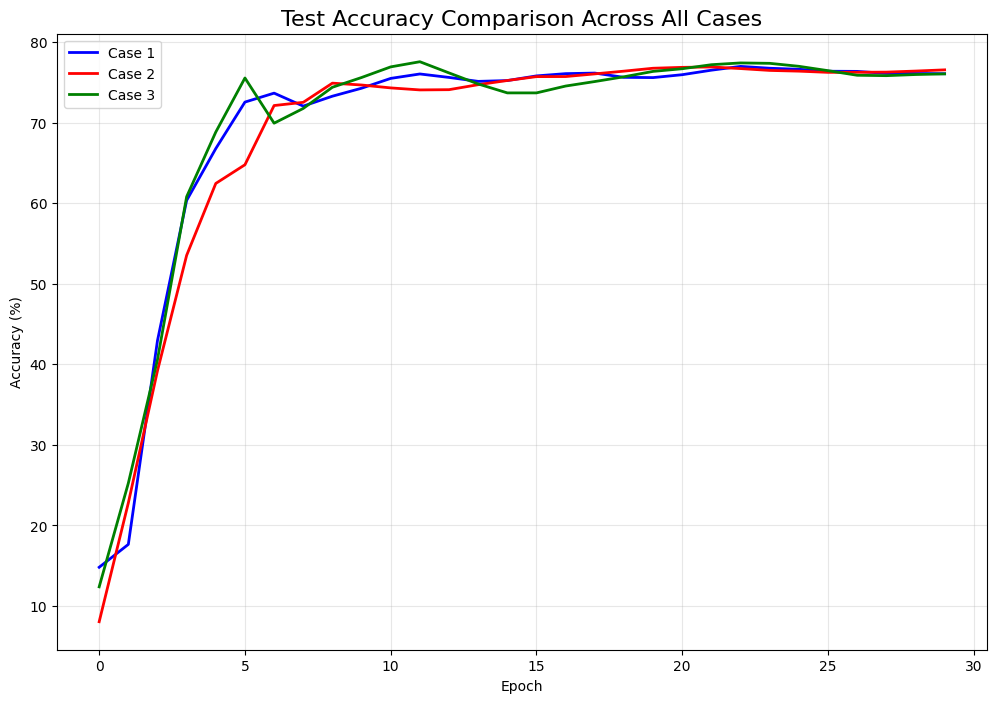


FINAL TRAINING SUMMARY
[ERROR] Unexpected exception: unsupported format string passed to list.__format__


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\484588850.py", line 435, in main
    print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: unsupported format string passed to list.__format__


In [4]:
#QR

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt



class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=3, num_classes=10, case=1):
        super(QuantumUnitaryNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.layer_norm = nn.LayerNorm(self.hidden_dim)

        
        self.forward_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])
        

        self.reverse_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])

    def _create_target_vectors(self):

        target_states_combined = torch.zeros((50000, 64), dtype=torch.complex128)
        target_states_combined[0:5000, 0] = 1
        target_states_combined[5000:10000, 7] = 1
        target_states_combined[10000:15000, 14] = 1
        target_states_combined[15000:20000, 21] = 1
        target_states_combined[20000:25000, 28] = 1
        target_states_combined[25000:30000, 35] = 1
        target_states_combined[30000:35000, 42] = 1
        target_states_combined[35000:40000, 49] = 1
        target_states_combined[40000:45000, 56] = 1
        target_states_combined[45000:50000, 63] = 1

        target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
        return F.normalize(target_states_combined, p=2, dim=1)
            
    

    @staticmethod
    @staticmethod
    def _make_unitary(w):
        q, r = torch.linalg.qr(w)
        d = torch.diag(r)
        ph = d / torch.abs(d)  # normalize to unit magnitude (e^{iθ})
        ph_matrix = torch.diag(ph)
        return q @ ph_matrix


    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):
        if self.case == 1:
            return self._case1_forward(x)
        elif self.case == 2:
            return self._case2_forward(x)
        elif self.case == 3:
            return self._case3_forward(x)
        else:
            raise ValueError("Invalid case value. Must be 1, 2, or 3.")


    def _case1_forward(self, x):

        target_vectors = self._create_target_vectors()

        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x@Uf1
        R1 = target_vectors@UR1
        F2 = F1@Uf2
        R2 = R1@UR2
        F3 = F2@Uf3
        R3 = R2@UR3

        Final = x@Uf1@Uf2@Uf3@UR3.conj().T@UR2.conj().T@UR1.conj().T

        return F1,F2,F3,R1,R2,R3,Final
    def _case2_forward(self, x):
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return Final

    def _case3_forward(self, x):
        target_vectors = self._create_target_vectors()
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x @ Uf1
        R1 = target_vectors @ UR1
        F2 = F1 @ Uf2
        R2 = R1 @ UR2
        F3 = F2 @ Uf3
        R3 = R2 @ UR3
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return F1, F2, F3, R1, R2, R3, Final




def case1_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_Fina1_target = F.cross_entropy(torch.abs(Final), torch.abs(target))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
                + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + reconstruction_loss_Fina1_target
    
    return total_loss

def case2_loss(Final, target):
    return F.cross_entropy(torch.abs(Final), torch.abs(target))

def case3_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    cross_entropy_loss = F.cross_entropy(torch.abs(Final), torch.abs(target))
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
               + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + cross_entropy_loss
    return total_loss



idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
T_train = np.zeros((50000, 64), dtype=np.complex128)
for c in range(10):
    T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

T_test = np.zeros((10000, 64), dtype=np.complex128)
for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0
train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.complex128),
                             torch.tensor(T_train, dtype=torch.complex128))
test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),
                             torch.tensor(T_test,  dtype=torch.complex128))

train_loader = DataLoader(train_dataset, batch_size=50000, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False, num_workers=0)



def evaluate_model(model, data_loader, device):
    model.eval()
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                F1,F2,F3,R1,R2,R3,Final = model(data)
            
                classes = torch.argmax(torch.abs(Final), dim=1)//7
                target_classes = torch.argmax(torch.abs(target), dim=1)//7
                correct = 0
                for i in range(len(classes)):
                    if classes[i] == target_classes[i]:
                        correct+=1

                accuracy = 100 * correct / 50000
            return accuracy

def evaluate_model_case2(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            Final = model(data)

       
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy

def evaluate_model_case3(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            _, _, _, _, _, _, Final = model(data)

    
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=100, learning_rate=0.001):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_reconstruction_loss = 0.0
        total_classification_loss = 0.0
        total_layer_constraint_loss = 0.0
        processed_batches = 0
        train_accuracy = 0
        test_accuracy = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case1_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()

            elif model.case == 2:
                Final = model(data)
                total_loss = case2_loss(Final, target)
                total_classification_loss += total_loss.item()

            elif model.case == 3:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case3_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()


            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # model.enforce_unitary_constraints()
            total_loss += total_loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss / processed_batches
            train_losses.append(avg_loss)

        if model.case == 1:
            train_accuracy = evaluate_model(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model(model, test_loader, device)
                test_accuracy*=5
        elif model.case == 2:
            train_accuracy = evaluate_model_case2(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case2(model, test_loader, device)
        elif model.case == 3:
            train_accuracy = evaluate_model_case3(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case3(model, test_loader, device)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)




        if model.case == 1 :
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches
            print(f"Epoch {epoch+1}/{num_epochs} - Case 1 Total: {avg_loss:.6f} "
                  f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                  f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 2:
            print(f"Epoch {epoch+1}/{num_epochs} - Case 2 Total: {avg_loss:.6f} "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 3:
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches if total_classification_loss > 0 else 0
            print(f"Epoch {epoch+1}/{num_epochs} - Case 3 Total: {avg_loss:.6f} "
                f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")



    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracies, test_accuracies




def main():
    """Main training pipeline"""
    
    input_dim = 64
    hidden_dim = 64
    degrees = 3
    num_classes = 10
    batch_size = 128
    num_epochs = 30
    learning_rate = 0.01

    try:


        all_results = {}


        for case_num in [1,2,3]:
            print("\n" + "="*60)
            print(f"TRAINING CASE {case_num}")
            print("="*60)
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=degrees,
                num_classes=num_classes,
                case=case_num
            )
            train_losses, train_acc, test_acc= train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            all_results[case_num] = {
                'model': model,
                'train_losses': train_losses,
                'train_acc': train_acc,
                'test_acc': test_acc
            }
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                axes[i].plot(results['train_acc'], 'g-', linewidth=2, label='Train')
                axes[i].plot(results['test_acc'], 'r-', linewidth=2, label='Test')
                axes[i].set_title(f'Case {case_num}: Accuracy', fontsize=14)
                axes[i].set_xlabel('Epoch')
                axes[i].set_ylabel('Accuracy (%)')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Comparison plot
        plt.figure(figsize=(12, 8))
        colors = ['blue', 'red', 'green', 'orange']
        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                plt.plot(results['test_acc'], color=colors[i], linewidth=2, label=f'Case {case_num}')

        plt.title('Test Accuracy Comparison Across All Cases', fontsize=16)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\n" + "="*60)
        print("FINAL TRAINING SUMMARY")
        print("="*60)
        for case_num in [1, 2, 3, 4]:
            if case_num in all_results:
                results = all_results[case_num]
                print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                print(f"Case {case_num} - Best Test Accuracy: {results['test_acc']:.2f}%")
        
        print("\nTraining completed successfully!")

    except FileNotFoundError as e:
        print("- train-images.idx3-ubyte")
        print("- train-labels.idx1-ubyte") 
        print("- t10k-images.idx3-ubyte")
        print("- t10k-labels.idx1-ubyte")
    except Exception as e:
        print(f"[ERROR] Unexpected exception: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3161254065.py:181: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),



TRAINING CASE 1
Training Case 1 on device: cpu


C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3161254065.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)


Epoch 1/30 - Case 1 Total: 134.655518 (Recon: 67.327759, Class: 0.000000) - Train Acc: 10.68% - Test Acc: 10.59%
Epoch 2/30 - Case 1 Total: 334.718455 (Recon: 167.359228, Class: 0.000000) - Train Acc: 14.94% - Test Acc: 14.32%
Epoch 3/30 - Case 1 Total: 326.981408 (Recon: 163.490704, Class: 0.000000) - Train Acc: 14.46% - Test Acc: 14.22%
Epoch 4/30 - Case 1 Total: 296.808201 (Recon: 148.404100, Class: 0.000000) - Train Acc: 14.01% - Test Acc: 13.62%
Epoch 5/30 - Case 1 Total: 381.952739 (Recon: 190.976369, Class: 0.000000) - Train Acc: 11.44% - Test Acc: 12.28%
Epoch 6/30 - Case 1 Total: 469.990262 (Recon: 234.995131, Class: 0.000000) - Train Acc: 6.41% - Test Acc: 5.97%
Epoch 7/30 - Case 1 Total: 255.237251 (Recon: 127.618626, Class: 0.000000) - Train Acc: 13.62% - Test Acc: 13.25%
Epoch 8/30 - Case 1 Total: 113.326597 (Recon: 56.663298, Class: 0.000000) - Train Acc: 11.55% - Test Acc: 11.43%
Epoch 9/30 - Case 1 Total: 94.056923 (Recon: 47.028462, Class: 0.000000) - Train Acc: 14.91%

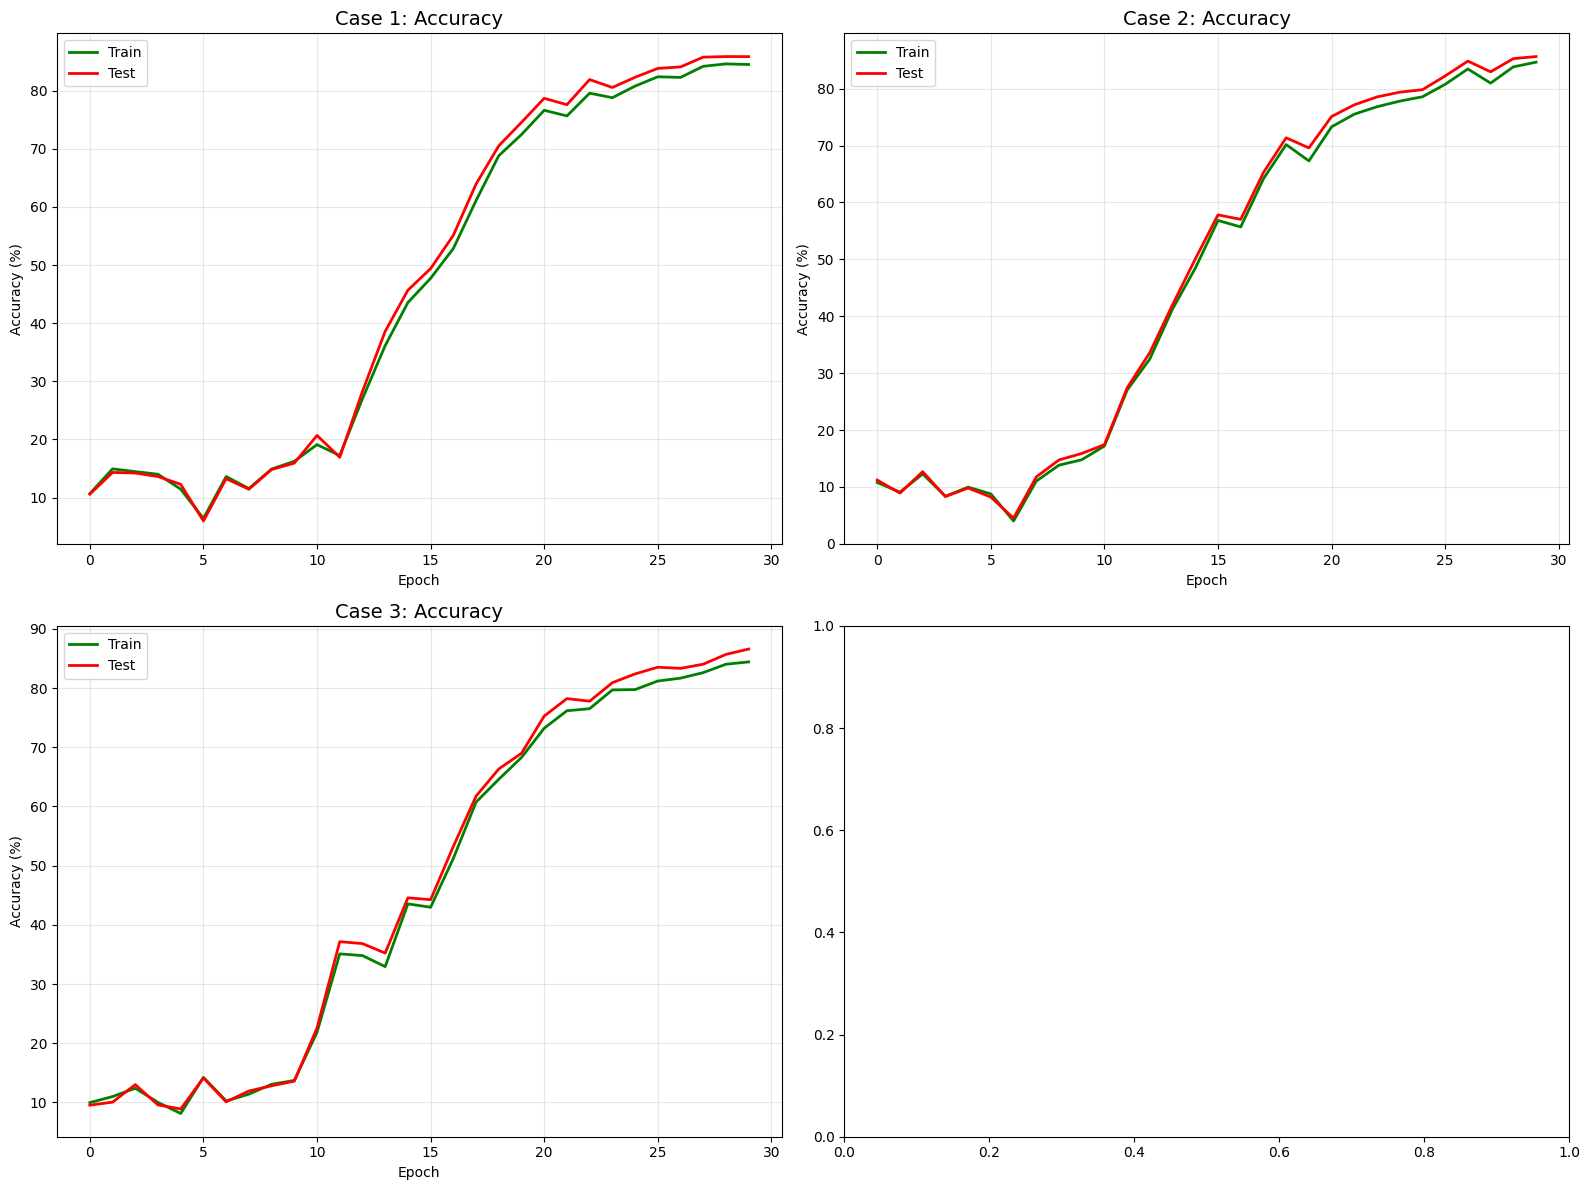

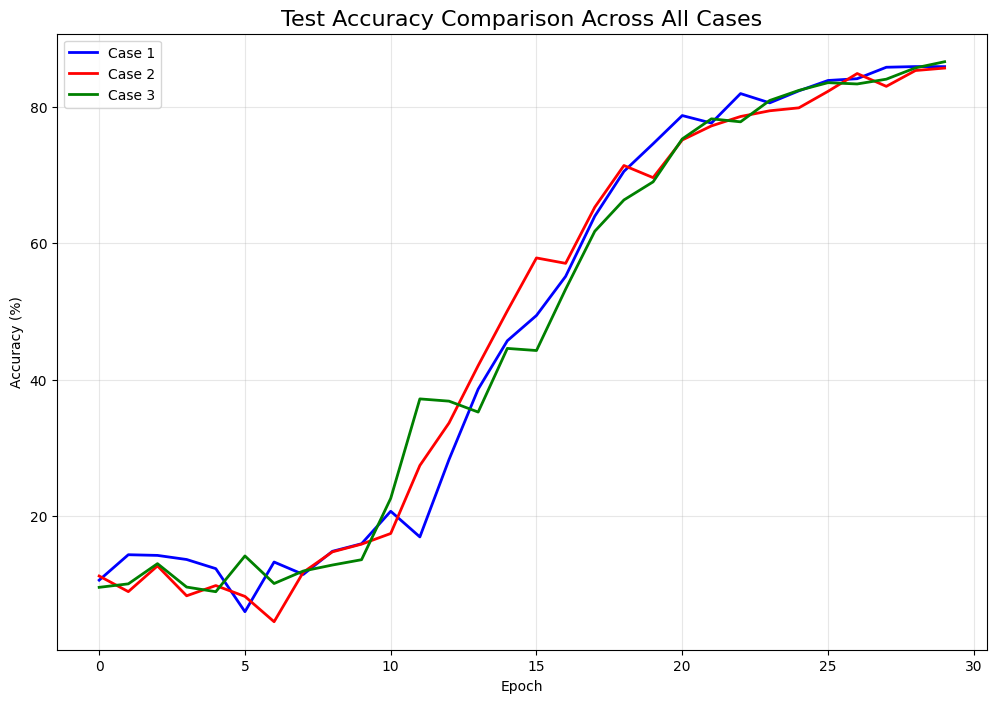


FINAL TRAINING SUMMARY
[ERROR] Unexpected exception: unsupported format string passed to list.__format__


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12468\3161254065.py", line 433, in main
    print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: unsupported format string passed to list.__format__


In [5]:
#matrixexp
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt



class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=3, num_classes=10, case=1):
        super(QuantumUnitaryNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.layer_norm = nn.LayerNorm(self.hidden_dim)

        
        self.forward_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])
        

        self.reverse_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.complex128) for _ in range(degrees)
        ])

    def _create_target_vectors(self):

        target_states_combined = torch.zeros((50000, 64), dtype=torch.complex128)
        target_states_combined[0:5000, 0] = 1
        target_states_combined[5000:10000, 7] = 1
        target_states_combined[10000:15000, 14] = 1
        target_states_combined[15000:20000, 21] = 1
        target_states_combined[20000:25000, 28] = 1
        target_states_combined[25000:30000, 35] = 1
        target_states_combined[30000:35000, 42] = 1
        target_states_combined[35000:40000, 49] = 1
        target_states_combined[40000:45000, 56] = 1
        target_states_combined[45000:50000, 63] = 1

        target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
        return F.normalize(target_states_combined, p=2, dim=1)
            
    

    @staticmethod
    @staticmethod
    def _make_unitary(w):
        w = w.to(dtype=torch.complex128)
        skew_hermitian = w - w.conj().T
        return torch.matrix_exp(1j * skew_hermitian)



    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):
        if self.case == 1:
            return self._case1_forward(x)
        elif self.case == 2:
            return self._case2_forward(x)
        elif self.case == 3:
            return self._case3_forward(x)
        else:
            raise ValueError("Invalid case value. Must be 1, 2, or 3.")


    def _case1_forward(self, x):

        target_vectors = self._create_target_vectors()

        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x@Uf1
        R1 = target_vectors@UR1
        F2 = F1@Uf2
        R2 = R1@UR2
        F3 = F2@Uf3
        R3 = R2@UR3

        Final = x@Uf1@Uf2@Uf3@UR3.conj().T@UR2.conj().T@UR1.conj().T

        return F1,F2,F3,R1,R2,R3,Final
    def _case2_forward(self, x):
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return Final

    def _case3_forward(self, x):
        target_vectors = self._create_target_vectors()
        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x @ Uf1
        R1 = target_vectors @ UR1
        F2 = F1 @ Uf2
        R2 = R1 @ UR2
        F3 = F2 @ Uf3
        R3 = R2 @ UR3
        Final = x @ Uf1 @ Uf2 @ Uf3 @ UR3.conj().T @ UR2.conj().T @ UR1.conj().T
        return F1, F2, F3, R1, R2, R3, Final




def case1_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_Fina1_target = F.cross_entropy(torch.abs(Final), torch.abs(target))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
                + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + reconstruction_loss_Fina1_target
    
    return total_loss

def case2_loss(Final, target):
    return F.cross_entropy(torch.abs(Final), torch.abs(target))

def case3_loss(F1, F2, F3, R1, R2, R3, Final, target, x):
    reconstruction_loss_F1_target = F.mse_loss(torch.abs(F1), torch.abs(target))
    reconstruction_loss_R1_x = F.mse_loss(torch.abs(R1), torch.abs(x))
    reconstruction_loss_F2_R1 = F.mse_loss(torch.abs(F2), torch.abs(R1))
    reconstruction_loss_R2_F1 = F.mse_loss(torch.abs(R2), torch.abs(F1))
    reconstruction_loss_F3_R2 = F.mse_loss(torch.abs(F3), torch.abs(R2))
    reconstruction_loss_R3_F2 = F.mse_loss(torch.abs(R3), torch.abs(F2))
    reconstruction_loss_R3_F3 = F.mse_loss(torch.abs(R3), torch.abs(F3))
    cross_entropy_loss = F.cross_entropy(torch.abs(Final), torch.abs(target))
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
               + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + cross_entropy_loss
    return total_loss



idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
T_train = np.zeros((50000, 64), dtype=np.complex128)
for c in range(10):
    T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

T_test = np.zeros((10000, 64), dtype=np.complex128)
for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0
train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.complex128),
                             torch.tensor(T_train, dtype=torch.complex128))
test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.complex128),
                             torch.tensor(T_test,  dtype=torch.complex128))

train_loader = DataLoader(train_dataset, batch_size=50000, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False, num_workers=0)



def evaluate_model(model, data_loader, device):
    model.eval()
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                F1,F2,F3,R1,R2,R3,Final = model(data)
            
                classes = torch.argmax(torch.abs(Final), dim=1)//7
                target_classes = torch.argmax(torch.abs(target), dim=1)//7
                correct = 0
                for i in range(len(classes)):
                    if classes[i] == target_classes[i]:
                        correct+=1

                accuracy = 100 * correct / 50000
            return accuracy

def evaluate_model_case2(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            Final = model(data)

       
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy

def evaluate_model_case3(model, data_loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            _, _, _, _, _, _, Final = model(data)

    
            pred_classes = torch.argmax(torch.abs(Final), dim=1) // 7
            true_classes = torch.argmax(torch.abs(target), dim=1) // 7

            correct += (pred_classes == true_classes).sum().item()
            total += data.size(0)

    accuracy = 100 * correct / total
    return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=100, learning_rate=0.001):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_reconstruction_loss = 0.0
        total_classification_loss = 0.0
        total_layer_constraint_loss = 0.0
        processed_batches = 0
        train_accuracy = 0
        test_accuracy = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case1_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()

            elif model.case == 2:
                Final = model(data)
                total_loss = case2_loss(Final, target)
                total_classification_loss += total_loss.item()

            elif model.case == 3:
                F1, F2, F3, R1, R2, R3, Final = model(data)
                total_loss = case3_loss(F1, F2, F3, R1, R2, R3, Final, target, data)
                total_reconstruction_loss += total_loss.item()


            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # model.enforce_unitary_constraints()
            total_loss += total_loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss / processed_batches
            train_losses.append(avg_loss)

        if model.case == 1:
            train_accuracy = evaluate_model(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model(model, test_loader, device)
                test_accuracy*=5
        elif model.case == 2:
            train_accuracy = evaluate_model_case2(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case2(model, test_loader, device)
        elif model.case == 3:
            train_accuracy = evaluate_model_case3(model, train_loader, device)
            if test_loader is not None:
                test_accuracy = evaluate_model_case3(model, test_loader, device)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)




        if model.case == 1 :
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches
            print(f"Epoch {epoch+1}/{num_epochs} - Case 1 Total: {avg_loss:.6f} "
                  f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                  f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 2:
            print(f"Epoch {epoch+1}/{num_epochs} - Case 2 Total: {avg_loss:.6f} "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        if model.case == 3:
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches if total_classification_loss > 0 else 0
            print(f"Epoch {epoch+1}/{num_epochs} - Case 3 Total: {avg_loss:.6f} "
                f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")



    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracies, test_accuracies




def main():
    """Main training pipeline"""
    
    input_dim = 64
    hidden_dim = 64
    degrees = 3
    num_classes = 10
    batch_size = 128
    num_epochs = 30
    learning_rate = 0.01

    try:


        all_results = {}


        for case_num in [1,2,3]:
            print("\n" + "="*60)
            print(f"TRAINING CASE {case_num}")
            print("="*60)
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=degrees,
                num_classes=num_classes,
                case=case_num
            )
            train_losses, train_acc, test_acc= train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            all_results[case_num] = {
                'model': model,
                'train_losses': train_losses,
                'train_acc': train_acc,
                'test_acc': test_acc
            }
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                axes[i].plot(results['train_acc'], 'g-', linewidth=2, label='Train')
                axes[i].plot(results['test_acc'], 'r-', linewidth=2, label='Test')
                axes[i].set_title(f'Case {case_num}: Accuracy', fontsize=14)
                axes[i].set_xlabel('Epoch')
                axes[i].set_ylabel('Accuracy (%)')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Comparison plot
        plt.figure(figsize=(12, 8))
        colors = ['blue', 'red', 'green', 'orange']
        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                plt.plot(results['test_acc'], color=colors[i], linewidth=2, label=f'Case {case_num}')

        plt.title('Test Accuracy Comparison Across All Cases', fontsize=16)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\n" + "="*60)
        print("FINAL TRAINING SUMMARY")
        print("="*60)
        for case_num in [1, 2, 3, 4]:
            if case_num in all_results:
                results = all_results[case_num]
                print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                print(f"Case {case_num} - Best Test Accuracy: {results['test_acc']:.2f}%")
        
        print("\nTraining completed successfully!")

    except FileNotFoundError as e:
        print("- train-images.idx3-ubyte")
        print("- train-labels.idx1-ubyte") 
        print("- t10k-images.idx3-ubyte")
        print("- t10k-labels.idx1-ubyte")
    except Exception as e:
        print(f"[ERROR] Unexpected exception: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()
